**Analyse des tendances des véhicules électriques à l’échelle mondiale (IEA 2024)**  

Les véhicules électriques (VE) jouent un rôle clé dans la transition énergétique mondiale. Ce dataset, issu des données de l'**International Energy Agency (IEA)**, offre une vision détaillée de l’évolution des ventes, du stock et de la part de marché des VE dans différentes régions du monde.  

Dans cette analyse, nous explorerons les tendances de l’adoption des VE, en examinant les ventes par année, la répartition géographique et l’évolution du marché selon les différents types de motorisation (**EV, BEV, PHEV**). L’objectif est d’identifier les marchés les plus dynamiques et de comprendre l’impact des politiques publiques sur l’adoption des VE.  

📊 **Points clés abordés** :  
- L’évolution des ventes et du stock de VE depuis 2011  
- Comparaison des parts de marché des VE dans différentes régions  
- Analyse des tendances par type de motorisation  

Ce projet permettra de mieux comprendre les dynamiques du marché des VE et d’anticiper les évolutions futures du secteur. 🚗⚡  

🔗 **Source des données** : Ce dataset provient de la plateforme de l’**IEA** et est distribué sous la licence **Creative Commons Attribution 4.0 (CC BY 4.0)**.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [2]:
df = pd.read_csv('/kaggle/input/iea-global-ev-data-2024/IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

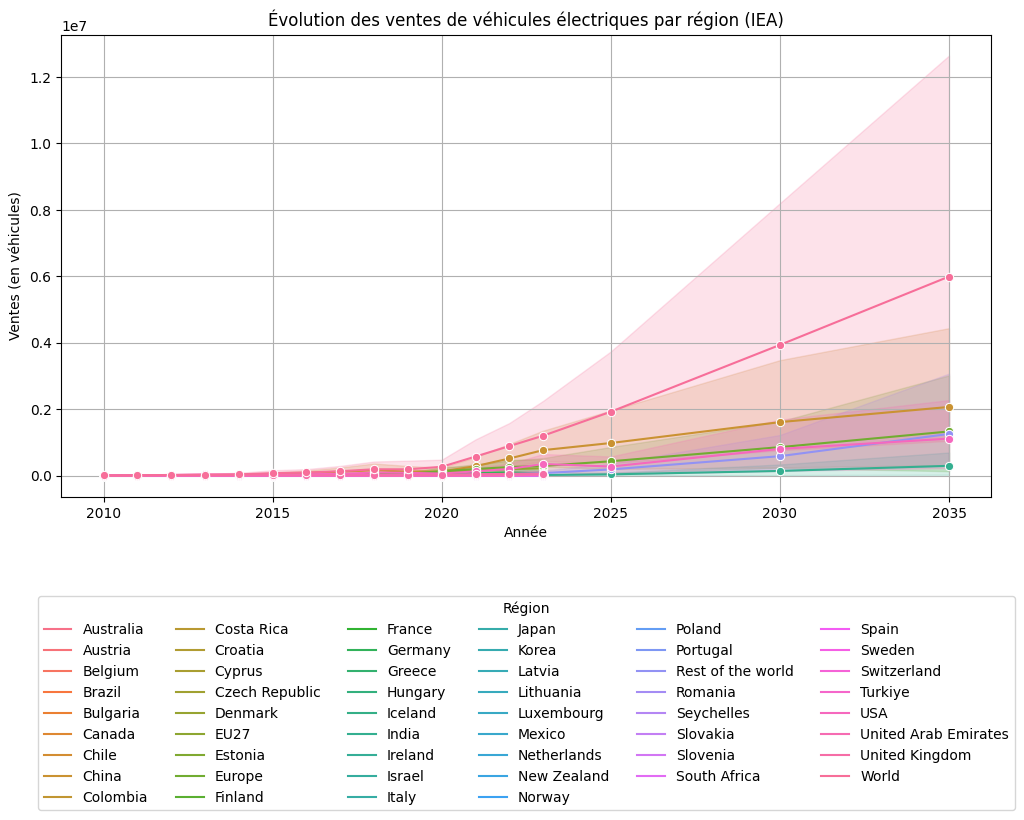

In [4]:
# Filtre des données pour ne garder que les ventes EV
df_sales = df[df["parameter"] == "EV sales"][["region", "year", "value"]]

# Vérification des données après filtrage
df_sales_sorted = df_sales.sort_values(by=["region", "year"])

# Graphique de l'évolution des ventes de VE par région
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sales_sorted, x="year", y="value", hue="region", marker="o")

plt.title("Évolution des ventes de véhicules électriques par région (IEA)")
plt.xlabel("Année")
plt.ylabel("Ventes (en véhicules)")
plt.legend(title="Région", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=6)
plt.grid(True)
plt.show()

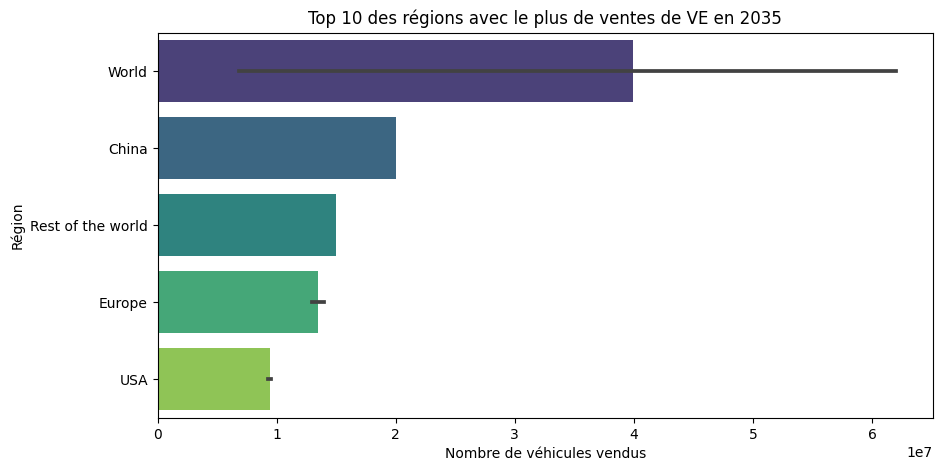

,region,year,value
12597,World,2035,62000000.0
12621,World,2035,51000000.0
2180,China,2035,20000000.0
2154,China,2035,20000000.0
9234,Rest of the world,2035,15000000.0
4247,Europe,2035,14000000.0
4295,Europe,2035,13000000.0
11381,USA,2035,9500000.0
11322,USA,2035,9300000.0
12594,World,2035,6800000.0


In [5]:
# Classement des régions en fonction des ventes pour la dernière année disponible
latest_year = df_sales["year"].max()
df_latest_sales = df_sales[df_sales["year"] == latest_year].sort_values(by="value", ascending=False)

# Affichage du top 10 des régions avec le plus de ventes de VE
plt.figure(figsize=(10, 5))
sns.barplot(data=df_latest_sales.head(10), x="value", y="region", palette="viridis")

plt.title(f"Top 10 des régions avec le plus de ventes de VE en {latest_year}")
plt.xlabel("Nombre de véhicules vendus")
plt.ylabel("Région")
plt.show()

# Affichage des 10 premières régions pour la dernière année
df_latest_sales.head(10)

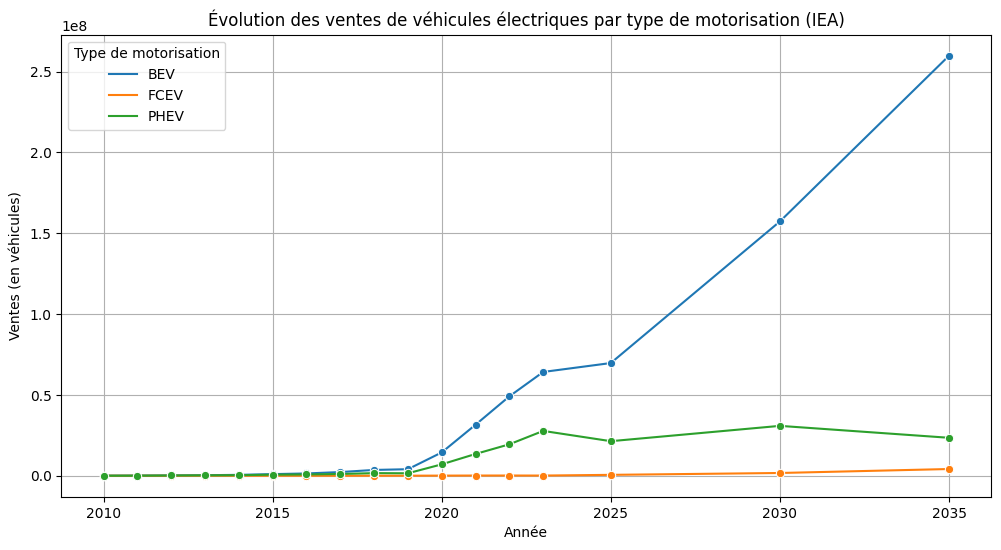

In [6]:
# Filtre des données pour ne garder que les ventes EV et la motorisation
df_powertrain = df[df["parameter"] == "EV sales"][["year", "powertrain", "value"]]

# Regroupement par année et type de motorisation
df_powertrain_grouped = df_powertrain.groupby(["year", "powertrain"]).sum().reset_index()

# Graphique de l'évolution des ventes par type de motorisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_powertrain_grouped, x="year", y="value", hue="powertrain", marker="o")

plt.title("Évolution des ventes de véhicules électriques par type de motorisation (IEA)")
plt.xlabel("Année")
plt.ylabel("Ventes (en véhicules)")
plt.legend(title="Type de motorisation")
plt.grid(True)
plt.show()

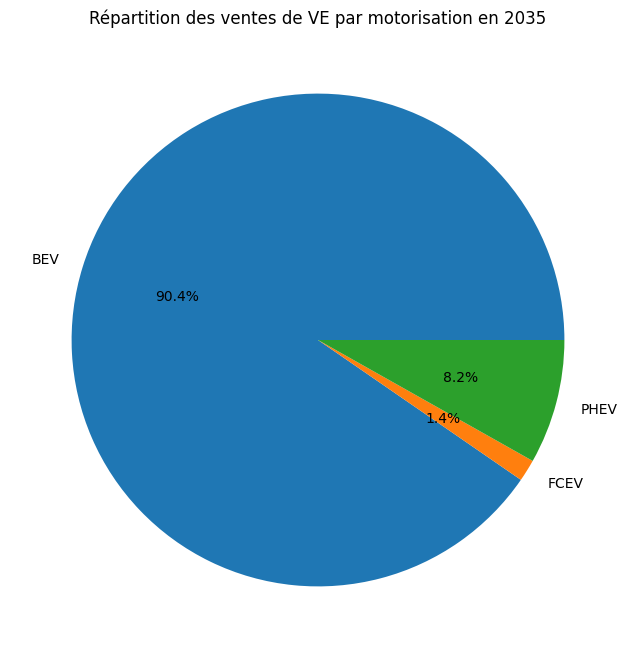

,year,value
powertrain,,
BEV,97680,259834500.0
FCEV,95645,4144100.0
PHEV,95645,23468470.0


In [7]:
# Part de marché des différentes motorisations sur la dernière année disponible
latest_year = df_powertrain["year"].max()
df_latest_powertrain = df_powertrain[df_powertrain["year"] == latest_year].groupby("powertrain").sum()

# Graphique en camembert (répartition des ventes par motorisation)
plt.figure(figsize=(8, 8))
df_latest_powertrain["value"].plot.pie(autopct='%1.1f%%', colors=["#1f77b4", "#ff7f0e", "#2ca02c"])

plt.title(f"Répartition des ventes de VE par motorisation en {latest_year}")
plt.ylabel("")
plt.show()

# Affichage des valeurs
df_latest_powertrain

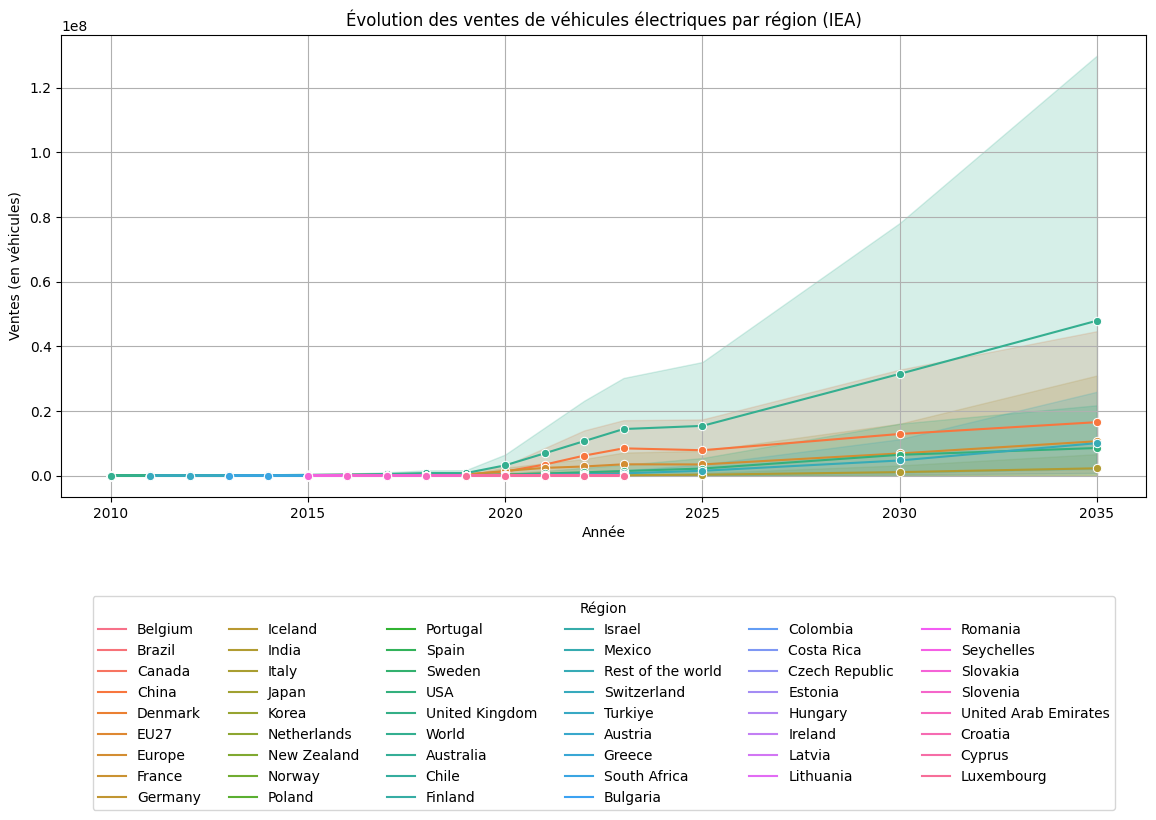

In [8]:
# Filtrer pour ne garder que les ventes EV
df_region = df[df["parameter"] == "EV sales"][["region", "year", "powertrain", "value"]]

# Regrouper par année, région et motorisation
df_region_grouped = df_region.groupby(["year", "region", "powertrain"]).sum().reset_index()

# Graphique de l'évolution des ventes de VE par région
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_region_grouped, x="year", y="value", hue="region", marker="o")

plt.title("Évolution des ventes de véhicules électriques par région (IEA)")
plt.xlabel("Année")
plt.ylabel("Ventes (en véhicules)")
plt.legend(title="Région", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=6)
plt.grid(True)
plt.show()

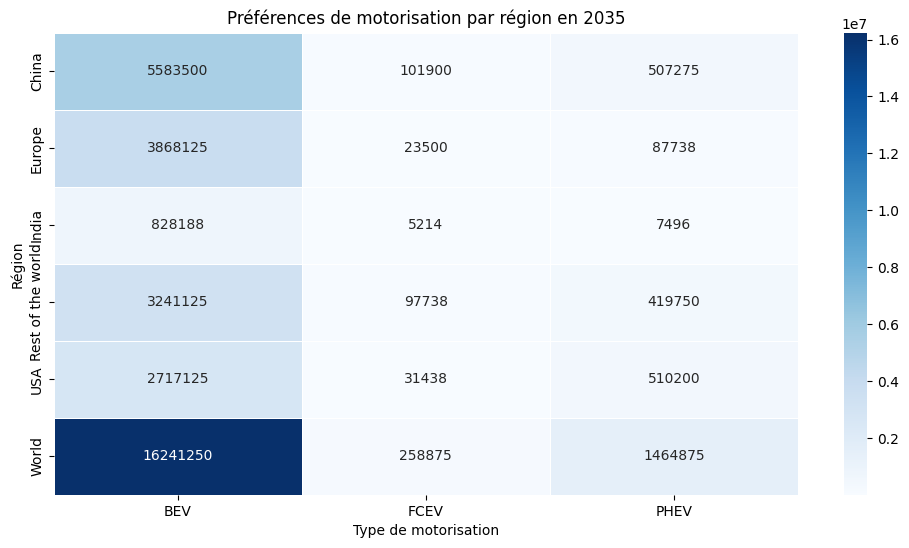

In [9]:
# Heatmap des préférences de motorisation par région en 2035
latest_year = df_region["year"].max()
df_heatmap = df_region[df_region["year"] == latest_year].pivot_table(index="region", columns="powertrain", values="value", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)

plt.title(f"Préférences de motorisation par région en {latest_year}")
plt.xlabel("Type de motorisation")
plt.ylabel("Région")
plt.show()